## Разделение данных

Для того чтобы оценить качество модели, нужно оценить ее работу на данных, которые она еще не видела.

В sklearn для разделения на тренировочную и тестовую выборки есть метод `train_test_split()`

In [1]:
from sklearn import datasets
datasets.__all__

['clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_species_distributions',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_rcv1',
 'fetch_kddcup99',
 'fetch_openml',
 'get_data_home',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_breast_cancer',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_circles',
 'make_classification',
 'make_checkerboard',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank_matrix',
 'make_moons',
 'make_multilabel_classification',
 'make_regression',
 'make_s_curve',
 'make_sparse_coded_signal',
 'make_sparse_spd_matrix',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll']

In [2]:
# Импортируем данные
from sklearn.datasets import load_breast_cancer

print(load_breast_cancer().DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
# Загружаем исходные данные
X, y = load_breast_cancer(return_X_y = True, as_frame = True)
print("Размерность матрицы признаков (фичей)", X.shape)
type(X)

Размерность матрицы признаков (фичей) (569, 30)


pandas.core.frame.DataFrame

In [4]:
print("Размерность вектора целевого признака (ответы или лейблы)", y.shape)
type(y)

Размерность вектора целевого признака (ответы или лейблы) (569,)


pandas.core.series.Series

In [5]:
X.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.014040,0.2016,0.05977,...,12.76,32.04,83.69,489.5,0.1303,0.16960,0.19270,0.07485,0.2965,0.07662
288,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.055880,0.2595,0.06233,...,11.86,22.33,78.27,437.6,0.1028,0.18430,0.15460,0.09314,0.2955,0.07009
98,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.033500,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756
263,15.61,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.028470,0.1547,0.05443,...,17.91,31.67,115.90,988.6,0.1084,0.18070,0.22600,0.08568,0.2683,0.06829
113,10.51,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.030680,0.1922,0.07782,...,11.16,22.75,72.62,374.4,0.1300,0.20490,0.12950,0.06136,0.2383,0.09026
425,10.03,21.28,63.19,307.3,0.08117,0.03912,0.00247,0.005159,0.1630,0.06439,...,11.11,28.94,69.92,376.3,0.1126,0.07094,0.01235,0.02579,0.2349,0.08061
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.066060,0.1842,0.06082,...,20.42,27.28,136.50,1299.0,0.1396,0.56090,0.39650,0.18100,0.3792,0.10480
212,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.159500,0.1648,0.05525,...,28.11,18.47,188.50,2499.0,0.1142,0.15160,0.32010,0.15950,0.1648,0.05525
545,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.024430,0.1664,0.05801,...,15.35,29.09,97.58,729.8,0.1216,0.15170,0.10490,0.07174,0.2642,0.06953
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.029950,0.2120,0.06623,...,14.45,21.74,93.63,624.1,0.1475,0.19790,0.14230,0.08045,0.3071,0.08557


In [6]:
y.sample(10)

535    0
425    1
183    1
79     1
227    1
231    1
41     0
66     1
48     1
57     0
Name: target, dtype: int64

In [7]:
# Импорт функции 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .2)

print("Размерность тренировочной выборки:", X_train.shape)
print("Размерность тестовой выборки:", X_test.shape)
print("Размерность тренировочных ответов:", y_train.shape)
print("Размерность тестовых ответов:", y_test.shape)

Размерность тренировочной выборки: (455, 30)
Размерность тестовой выборки: (114, 30)
Размерность тренировочных ответов: (455,)
Размерность тестовых ответов: (114,)


## Логистическая регрессия

Логистическая регрессия - вероятностная модель, предсказывающая принадлежность наблюдения какому-либо классу.

Задается при помощи логистической функции: $$f(x) = \frac{1}{1 + e^{-x}}$$

Если хочется узнать математическую базу алгоритма (нужно знать теорию вероятностей): https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F

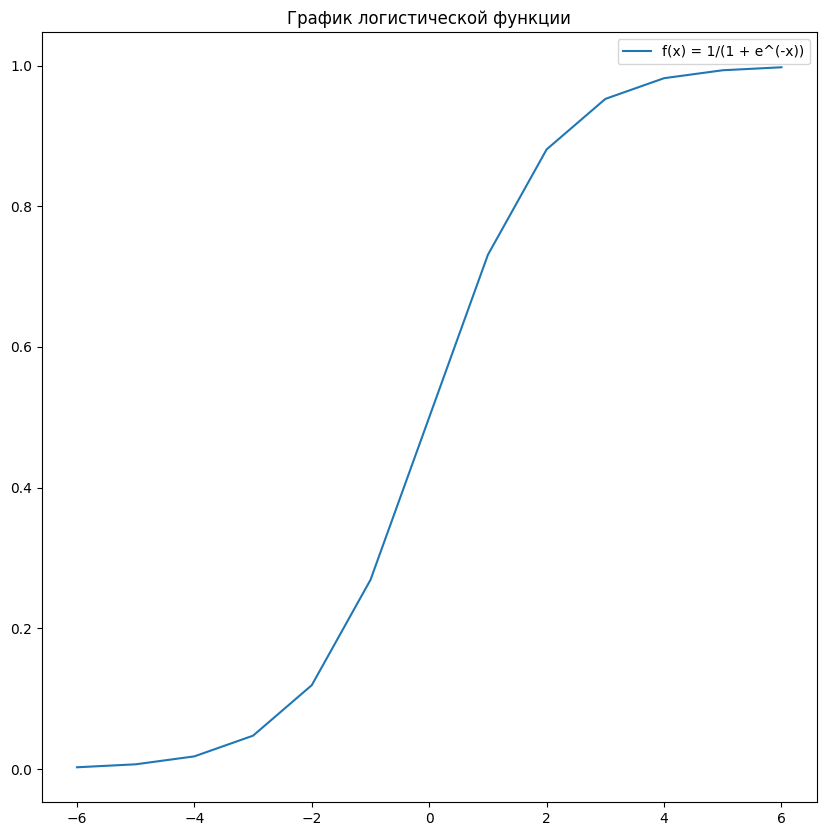

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def log_func(x):
    return 1/(1 + np.exp(-x))

plt.figure(figsize = (10, 10))
plt.plot([x for x in range(-6, 7)], [log_func(x) for x in range(-6, 7)],
        label = 'f(x) = 1/(1 + e^(-x))')
plt.title('График логистической функции')
plt.legend()

plt.show()

В библиотеке sklearn логистическая регрессия является частью класса `linear_model`

Обучим модель на тренировочной выборке

In [9]:
# Импортируем лог. регрессию
from sklearn.linear_model import LogisticRegression

# Создаем модель
model = LogisticRegression(random_state = 42)

model.fit(X_train, y_train)

/opt/lab/env/lib64/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Т.к. это задача классификации посмотрим на accuracy и roc_auc_score на тестовых данных

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score

pred = model.predict(X_test)

print('Accuracy score:', accuracy_score(pred, y_test))
print('roc_auc_score score:', roc_auc_score(pred, y_test))

Accuracy score: 0.956140350877193
roc_auc_score score: 0.9604729729729731


In [23]:
# y = [1, 0, 0]
# y_pred = [0, 1, 0]
# 1/3 
# print('Accuracy score:', accuracy_score(y, y_pred))
# print('roc_auc_score score:', roc_auc_score(y, y_pred))

### Чем плоха метрика accuracy

Предположим, наша модель призвана определять спам в письмах (1 - спам, 0 - не спам). Т.к. спамовое письмо из множества поступающих писем, давольно редкое событие, то все события, включая спам можно записать так:

```
x = [1, 0 , 0 , 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
``` 
где единица, это одно событие со спамом.

Тогда в случае наличия очень плохой модели, которая ничего не предскажет, мы получим резульатат

```
x_pred = [0, 0 , 0 , 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
```

И если посчитать accuracy, то получим отношение угаданных событий к общему количеству 29/30 = 0.966666666666666.
96%-ой точности может позавидовать не одна нейросеть. Но, по факту, наша модель ничего не предсказала, она вообще нерабочая. Поеэтому придумали другие метрики, позволяющие с учетом вышесказанного, определять правильность моделей. 

## Гиперпараметры и их подбор

У модели логистической немного гиперпараметров, полный список можно посмотреть здесь: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

Попробуем увеличить количество итераций `max_iter` с дефолтных 100 на 1000

In [12]:
model_1000 = LogisticRegression(max_iter = 1000, random_state = 42)

model_1000.fit(X_train, y_train)
pred_1000 = model_1000.predict(X_test)

print('Accuracy score:', accuracy_score(pred_1000, y_test))
print('roc_auc_score score:', roc_auc_score(pred_1000, y_test))


Accuracy score: 0.956140350877193
roc_auc_score score: 0.9604729729729731


/opt/lab/env/lib64/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


У многих других алгоритмов, например основанных на деревьях принятия решений, о которых мы поговорим на следующем уроке, может быть очень много гиперпараметров и подбирать их оптимальную комбинацию - трудоемкий процесс.

Для этих целей можно использовать встроенные в sklearn методы поиска по сетке `GridSearchCV` и случайного поиска `RandomizedSearchCV`

In [13]:
# Импорт модуля svm
from sklearn import svm

# Импорт функции для поиска по сетке
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# модель
svc = svm.SVC()
# поиск по сетке
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print("Лучшая комбинация гиперпараметров", clf.best_params_)

Лучшая комбинация гиперпараметров {'C': 1, 'kernel': 'linear'}


## Кросс-валидация

Используя обычный `train_test_split` может возникнуть такая ситуация: в обучающую выборку попали лишь объекты одного класса, соответственно модель научится определять только один класс

Чтобы избежать такого и других сценариев связанных со случайным разбиением данных на выборки, применяют **кросс-валидацию**

Типичным примером кросс-валидации является `KFold`

ValueError: Found input variables with inconsistent numbers of samples: [569, 3, 9]

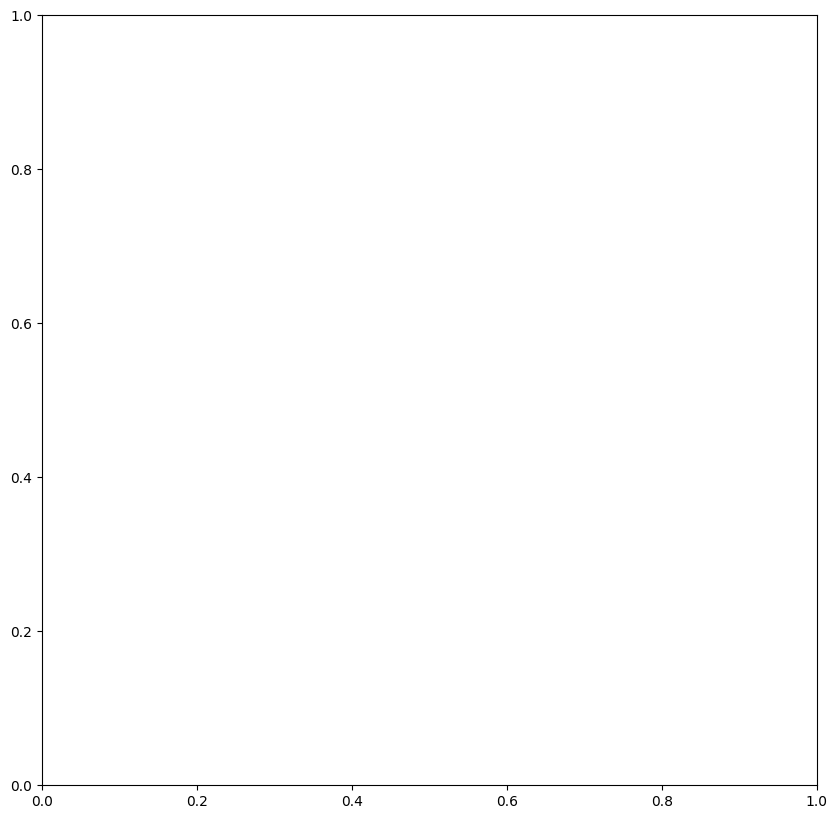

In [31]:
# KFold находится в модуле `model_selection`
from sklearn.model_selection import KFold
import pandas as pd
# Для визуализации
from matplotlib.patches import Patch


# Функция для визуализации
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax


fig, ax = plt.subplots(figsize = (10, 10))
# Создаем KFold
n_splits = 4
groups = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)
plt.show();